In [1]:
pip install pyserial

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Librerias
import serial.tools.list_ports
import serial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [3]:
    # Función que regresa el verdadero valor hexadecimal.
    # Por ejemplo, si recibe un 15 devuelve f, y si recibe un número menor a 10, devuelve el número sin modificarlo
    def obtener_caracter_hexadecimal(valor):
        # Lo necesitamos como cadena
        valor = str(valor)
        equivalencias = {
            "10": "A",
            "11": "B",
            "12": "C",
            "13": "D",
            "14": "E",
            "15": "F",
        }
        if valor in equivalencias:
            return equivalencias[valor]
        else:
            return valor


    def decimal_a_hexadecimal(decimal):
        hexadecimal = ""
        while decimal > 0:
            residuo = decimal % 16
            verdadero_caracter = obtener_caracter_hexadecimal(residuo)
            hexadecimal = verdadero_caracter + hexadecimal
            decimal = int(decimal / 16)
        return hexadecimal
    
    #tipo de movimiento 
    def Tipo_de_movimiento(lower_bound, upper_bound):
        while True:
            try:
                number = int(input("Tipo de desplazamiento:Mov absoluto (1) o Mov Relativo (2)"))

                if number == lower_bound:
                    tip = str("0ma")
                    return tip
                if number == upper_bound:
                    tip = str("0mr")
                    return tip
            except ValueError:
                pass
            print(f"Por favor ingresa un número ({lower_bound} o {upper_bound})")
            
    #Detecta los puertos
    def Detección_de_puertos(puertos):

        # Obtener una lista de puertos seriales disponibles
        ports = serial.tools.list_ports.comports()

        # Imprimir la lista de puertos seriales disponibles
        print("Puertos seriales disponibles:")
        for i, port in enumerate(ports):
            print(f"{i+1}. {port.device}")

        # Permitir al usuario seleccionar un puerto serial
        selected_port = int(input("Seleccione el puerto para el " + puertos))

        # Asignar el puerto serial seleccionado a diferentes funciones
        #Configuración del puerto
        port = serial.Serial(ports[selected_port-1].device,  baudrate=9600, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=0, rtscts=0)

        #Apertura del puerto

        #port.open()
        a = port.is_open

        #Comprobación del estado del puerto e inicialización

        if a:
            print("El puerto se encuentra abierto" + "\n")

        else:
            print("Puerto no disponible" + "\n")

        return port
    
    #Fución que que toma datos de un cierto perido y luego devuelve el promedio de ellos
    def Data_prom(ser, num):
        # Creamos una lista vacía
        lista = []

        # Pedimos al usuario que ingrese 10 datos y los agregamos a la lista
        for i in range(num):
            while True:
                dato = ser.readline().decode().strip()
                try:
                    valor = float(dato)
                    lista.append(valor)
                    break
                except:
                    print("Ingrese un valor numérico")

        # Calculamos el promedio de los valores en la lista
        if len(lista) > 0:
            promedio = sum(lista) / len(lista)
            print("La lista es:", lista)
            print("El promedio de los valores en la lista es:", promedio)
        else:
            print("La lista está vacía")
        return promedio
    
    #Función que se encarga de graficar los datos obtenidos del fotodiodo
    def Graficar(name):

        # Cargar datos CSV sin etiquetas
        df = pd.read_csv('80.txt', names=['columna1', 'columna2'])

        # Eliminar duplicados de x
        x_unique, y_unique = np.unique(df['columna1'], return_index=False), df['columna2'][np.unique(df['columna1'], return_index=True)[1]]

        # Interpolar los datos
        x_smooth = np.linspace(x_unique[0], x_unique[-1], 200)
        y_smooth = make_interp_spline(x_unique, y_unique, k=3)(x_smooth)

        # Crear gráfico con la curva suavizada
        plt.plot(x_smooth, y_smooth, color='red', label='Curva suavizada')

        #Crear gráfico con la curva no suavizada
        plt.plot(x_unique, y_unique, color='blue', label='Curva no suavizada')

        # Mostrar los puntos originales
        plt.scatter(x_unique, y_unique, color='black', label='Datos obtenidos')

        #Barras de error
        plt.errorbar(x_unique, y_unique, xerr=2.51E-03, yerr=0.05, fmt='o', color='black', 
                     ecolor='black', elinewidth=0.5, capsize=2)

        # Añadir leyenda
        plt.legend()

        # Agregar etiquetas y título al gráfico
        plt.xlabel('Ángulo de incidencia Θ (grados)')
        plt.ylabel('Intensidad')
        plt.title('Curva de intensidad en función del ángulo de incidencia')


        # Mostrar el gráfico
        return plt.show()

Puertos seriales disponibles:
1. COM8
2. COM5
Seleccione el puerto para el Motor :2
El puerto se encuentra abierto

Puertos seriales disponibles:
1. COM8
2. COM5
Seleccione el puerto para el Arduino :1
El puerto se encuentra abierto

Ingrese el nombre del archivo con el que desea que se guarde :90
Ingrese el desplazamiento (entre 0 y 359.99). 
O ingrese 999 para finalizar90
Tipo de desplazamiento:Mov absoluto (1) o Mov Relativo (2)1
En hexadecimal :  0PO00008BFD

Normal :  b'0PO00008BFD\r\n'
En grados :  89.99
La lista es: [1.7, 1.7, 1.7, 1.7, 1.69, 1.69, 1.69, 1.69, 1.68, 1.68]
El promedio de los valores en la lista es: 1.6919999999999997
Promedio intesidad :  1.6919999999999997
Ingrese el desplazamiento (entre 0 y 359.99). 
O ingrese 999 para finalizar999
Programa detenido


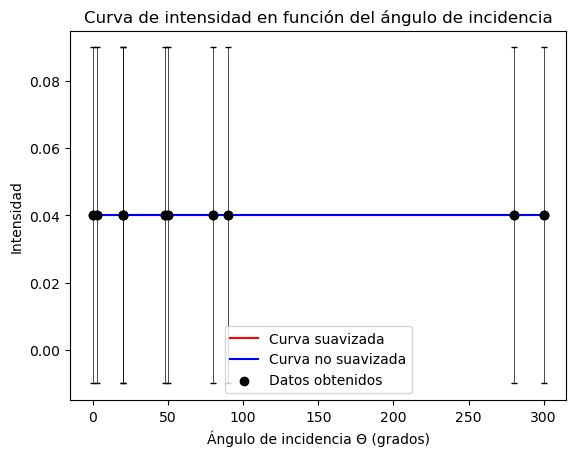

False

In [5]:
#Detección, apertura y comprobación de los puertos:

mot = Detección_de_puertos("Motor :")
ardu = Detección_de_puertos("Arduino :")

#inicialización

com2 = "0ho0"
init2 = com2.encode('utf_8','strict')
mot.write(init2) 

#Leer una línea de respuesta
response = mot.readline() 

# Crear un archivo para guardar los datos

file_name = input("Ingrese el nombre del archivo con el que desea que se guarde :")
file = open(file_name + ".txt","w") 

while True: 
    try:
        #Ingreso del desplazamiento angular
        des = float(input("Ingrese el desplazamiento (entre 0 y 359.99). \nO ingrese 999 para finalizar"))
        if des == 999:
            print("Programa detenido")
            break
        if 0 <= des < 360:

            #Conversión a hexadecimal y codificación
            dec_num = (float(des)*np.pi)/(4.38282*pow(10,-5)*180)
            hexa = decimal_a_hexadecimal(int(dec_num))
            hexa = hexa.zfill(8)

            #tipo de movimiento
            tipo = Tipo_de_movimiento(1,2)
            hexa = str(tipo + hexa)
            #print(hexa)
            str_encoded= hexa.encode('utf_8','strict') 

            # Enviar una cadena de bytes
            mot.write(str_encoded)

            #Verificación del hexadecimal unido
            #str_encoded

            # Leer una línea de respuesta
            response = mot.readline() 
            print("En hexadecimal : ", response.decode())
            print("Normal : ", response)
            
            # Respuesta y conversión a decimal

            prueba1 = response.decode()
            
            
            res_des = int(prueba1[3:11],16)

            #Conversión a decimal a grados de la posión del motor

            save_des = res_des*(4.38282*pow(10,-5)*180)/np.pi

            #Impresión de la posión del motor en grados
            print ("En grados : ","{0:.2f}".format(save_des))       
            
            
            # Leer el segundo dato de la comunicación serial
            dato2 = Data_prom(ardu, 10)
            
            #Impresion datos promedio de fotodiodo
            print ("Promedio intesidad : ", dato2)     
        
            # Escribir los datos en el archivo
            file.write("{0},{1}\n".format(save_des, dato2))

        else:
            print("Por favor ingresa un número válido")
    except ValueError:
        print("Por favor ingresa un número válido")

#Cerrar Archivo

file.close()

#Graficar 

Graficar(file_name)

# Mostrar el gráfico
plt.show()
            
#Cerrar puerto
mot.close()
mot.is_open

ardu.close()
ardu.is_open

In [12]:
#Cerrar puerto
mot.close()
mot.is_open

ardu.close()
ardu.is_open

False

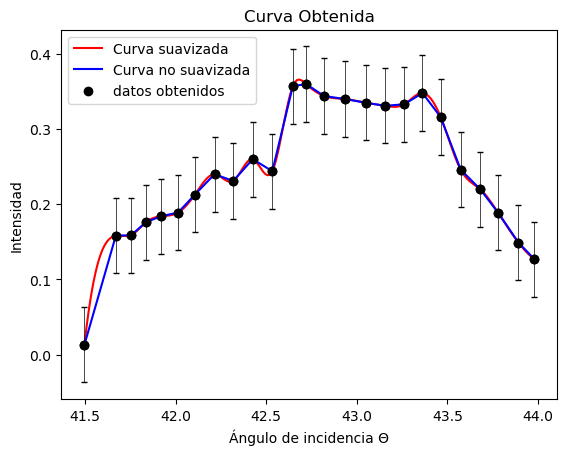

In [11]:
# Cargar datos CSV sin etiquetas
df = pd.read_csv('Data12.txt', names=['columna1', 'columna2'])

# Interpolar los datos
x = np.array(df['columna1'])
y = np.array(df['columna2'])

# Interpolar los datos
x, y = zip(*sorted(zip(x, y)))
x_smooth = np.linspace( x[0], x[-1], 200)
y_smooth = make_interp_spline(x, y, k=3)(x_smooth)

# Crear gráfico con la curva suavizada
plt.plot(x_smooth, y_smooth, color='red', label='Curva suavizada')

#Crear gráfico con la curva no suavizada
plt.plot(x, y, color='blue', label='Curva no suavizada')


# Mostrar los puntos originales
plt.scatter(x, y, color='black', label='datos obtenidos')

#Barras de error

plt.errorbar(x, y, xerr = 2.51E-03, yerr = 0.05,  fmt = 'o',color = 'black', 
            ecolor = 'black', elinewidth = 0.5, capsize=2)

# Añadir leyenda
plt.legend()

# Agregar etiquetas y título al gráfico
plt.xlabel('Ángulo de incidencia Θ')
plt.ylabel('Intensidad')
plt.title('Curva Obtenida')

# Mostrar el gráfico
plt.show()

In [7]:
# Cargar datos CSV sin etiquetas
df = pd.read_csv('output.txt', names=['columna1', 'columna2'])

# Eliminar duplicados de x
x_unique, y_unique = np.unique(df['columna1'], return_index=False), df['columna2'][np.unique(df['columna1'], return_index=True)[1]]

# Interpolar los datos
x_smooth = np.linspace(x_unique[0], x_unique[-1], 200)
y_smooth = make_interp_spline(x_unique, y_unique, k=3)(x_smooth)

# Crear gráfico con la curva suavizada
plt.plot(x_smooth, y_smooth, color='red', label='Curva suavizada')

#Crear gráfico con la curva no suavizada
plt.plot(x_unique, y_unique, color='blue', label='Curva no suavizada')

# Mostrar los puntos originales
plt.scatter(x_unique, y_unique, color='black', label='Datos obtenidos')

#Barras de error
plt.errorbar(x_unique, y_unique, xerr=2.51E-03, yerr=0.05, fmt='o', color='black', 
             ecolor='black', elinewidth=0.5, capsize=2)

# Añadir leyenda
plt.legend()

# Agregar etiquetas y título al gráfico
plt.xlabel('Ángulo de incidencia Θ (grados)')
plt.ylabel('Intensidad')
plt.title('Curva de intensidad en función del ángulo de incidencia')

# Mostrar el gráfico
plt.show()


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U18'), dtype('float64')) -> None

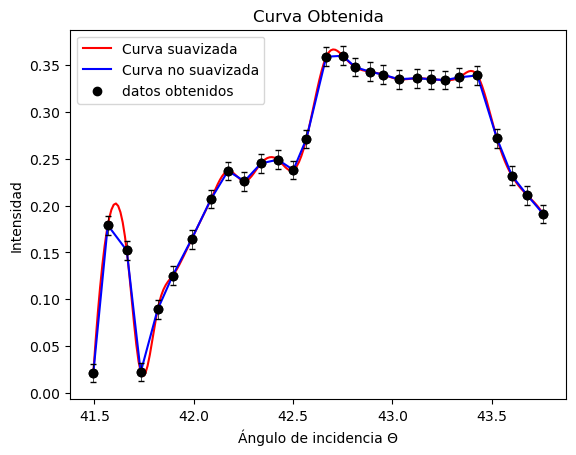

In [14]:
# Cargar datos CSV sin etiquetas
df = pd.read_csv('Data3.txt', names=['columna1', 'columna2'])

# Interpolar los datos
x = np.array(df['columna1'])
y = np.array(df['columna2'])

# Interpolar los datos
x, y = zip(*sorted(zip(x, y)))
x_smooth = np.linspace( x[0], x[-1], 200)
y_smooth = make_interp_spline(x, y, k=3)(x_smooth)

# Crear gráfico con la curva suavizada
plt.plot(x_smooth, y_smooth, color='red', label='Curva suavizada')

#Crear gráfico con la curva no suavizada
plt.plot(x, y, color='blue', label='Curva no suavizada')


# Mostrar los puntos originales
plt.scatter(x, y, color='black', label='datos obtenidos')

#Barras de error

plt.errorbar(x, y, xerr = 2.51E-03, yerr = 0.01,  fmt = 'o',color = 'black', 
            ecolor = 'black', elinewidth = 0.5, capsize=2)

# Añadir leyenda
plt.legend()

# Agregar etiquetas y título al gráfico
plt.xlabel('Ángulo de incidencia Θ')
plt.ylabel('Intensidad')
plt.title('Curva Obtenida')

# Mostrar el gráfico
plt.show()